# Analysing Outbreaks
This notebook takes in the day the pandemic broke into each town according to simulations as an input and calculates average day to reach town, standard deviation, and plots the frequency (may convert it to probability later)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [3]:
free = pd.read_csv('/Volumes/HardDrive/New_Workflow/breaks_44_<250/free_movement.csv', header = None)
regn = pd.read_csv('/Volumes/HardDrive/New_Workflow/breaks_44_<250/regional_restrictions.csv', header = None)
lock = pd.read_csv('/Volumes/HardDrive/New_Workflow/breaks_44_<250/full_lockdown.csv', header = None)

In [4]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos_withregions.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]

# When ignoring sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
                  (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
                 (waloc['City / Town'] != 'Two Rocks') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring rural sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Pinjarra') & (waloc['City / Town'] != 'Drummond Cove') &
                  (waloc['City / Town'] != 'Bridgetown') & (waloc['City / Town'] != 'Binningup') &
                 (waloc['City / Town'] != 'Dampier') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring 0 flow towns
waloc = waloc.loc[(waloc['City / Town'] != 'Kununurra') & (waloc['City / Town'] != 'Derby') &
                  (waloc['City / Town'] != 'Boddington-Ranford') & (waloc['City / Town'] != 'Wyndham')]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

In [5]:
region_color_dict = {'Perth':'0','Gascoyne':'40','Goldfields-Esperance':'41','Great Southern':'42','Kimberley':'43',
                    'Mid West':'44','Pilbara':'45','South West':'46', 'Wheatbelt':'47','Peel':'105'}

for item in region_color_dict:
    print('\033[;' + region_color_dict[item] +'m  ','\033[0m' +item)

   Perth
   Gascoyne
   Goldfields-Esperance
   Great Southern
   Kimberley
   Mid West
   Pilbara
   South West
   Wheatbelt
   Peel


In [11]:
ave_breaks_free = {}
std_breaks_free = {}

ave_breaks_regn = {}
std_breaks_regn = {}

ave_breaks_lock = {}
std_breaks_lock = {}

for i in range(44):
    cou = list(free[i])
    nonan_cou =  [x for x in cou if np.isnan(x) == False]
    ave = np.mean(nonan_cou)
    std = np.std(nonan_cou)
    if np.isnan(ave):
        ave = 1000
        std = 1000
    town = list(waloc.iloc[i])[0]
    ave_breaks_free[town] = ave
    std_breaks_free[town] = std
    
    cou = list(regn[i])
    nonan_cou =  [x for x in cou if np.isnan(x) == False]
    ave = np.mean(nonan_cou)
    std = np.std(nonan_cou)
    if np.isnan(ave):
        ave = 1000
        std = 1000
    town = list(waloc.iloc[i])[0]
    ave_breaks_regn[town] = ave
    std_breaks_regn[town] = std
    
    cou = list(lock[i])
    nonan_cou =  [x for x in cou if np.isnan(x) == False]
    ave = np.mean(nonan_cou)
    std = np.std(nonan_cou)
    if np.isnan(ave):
        ave = 1000
        std = 1000
    town = list(waloc.iloc[i])[0]
    ave_breaks_lock[town] = ave
    std_breaks_lock[town] = std
    
sd = {k: v for k, v in sorted(ave_breaks_free.items(), key=lambda item: item[1])}
#print("{:22s} {:>20s} {:>20s} {:>20s}").format('Town','Free Movement', 'Regional Borders', 'Full Lockdown')
print("{:2s} {:20s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}".format('','Town',  'Ave. Days', 'StDev',
                                                                            'Ave. Days' , 'StDev',
                                                                           'Ave. Days' , 'StDev'))
for item in sd:
    reg = list(waloc.loc[waloc['City / Town']==item]['Region'])[0]
    print('\033[;' + region_color_dict[reg] +'m  ','\033[0m'+"{:20s} {:10.1f} {:10.1f} {:10.1f} {:10.1f} {:10.1f} {:10.1f}".format(item,
                                                          ave_breaks_free[item], 
                                                          std_breaks_free[item], 
                                                         ave_breaks_regn[item],
                                                         std_breaks_regn[item], 
                                                        ave_breaks_lock[item], 
                                                        std_breaks_lock[item]))
    
print('______________________________________________________________________')
for item in region_color_dict:
    print('\033[;' + region_color_dict[item] +'m  ','\033[0m' +item)

   Town                  Ave. Days      StDev  Ave. Days      StDev  Ave. Days      StDev
   Perth                       0.0        0.0        0.0        0.0        0.0        0.0
   Mandurah                    9.6        5.6       17.6        4.2       26.8       20.9
   Karratha                   29.2       11.2       46.3       15.0       52.7       43.2
   Newman                     29.6       13.5       33.7       10.9        1.5        0.5
   Tom Price                  32.9       11.1       43.0       13.8       89.5       26.5
   Port Hedland               33.8       16.8       49.5       14.6       77.5       15.5
   Bunbury                    33.9       16.5       71.4        5.9     1000.0     1000.0
   Kalgoorlie-Boulder         37.0        9.9       56.7        9.7       58.5       27.5
   Paraburdoo                 37.5       16.0       48.5       14.5       75.0        0.0
   Busselton                  42.0       18.3       72.5        7.0     1000.0     1000.0
   Northam

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


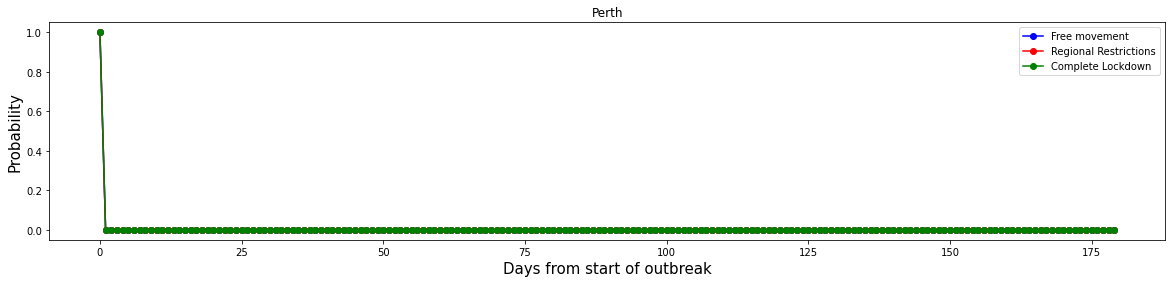

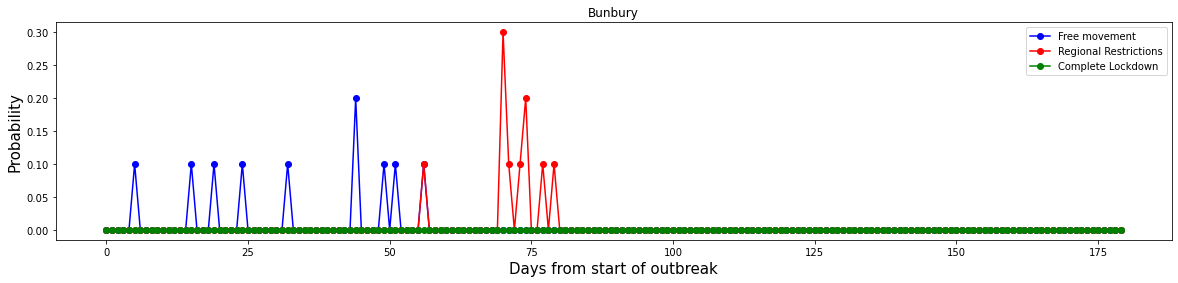

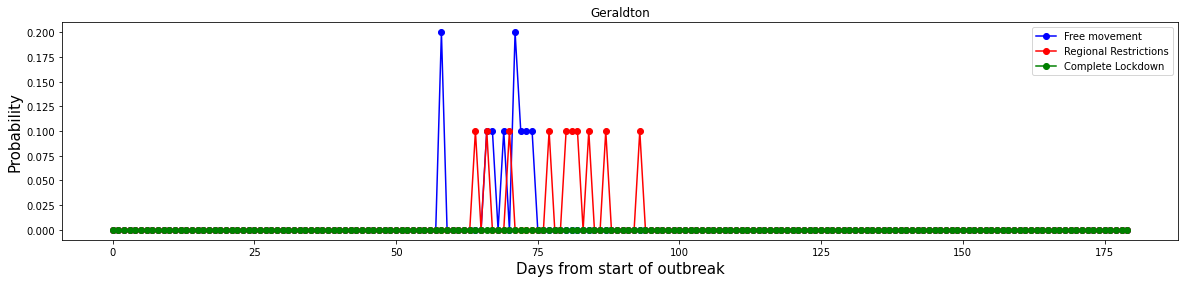

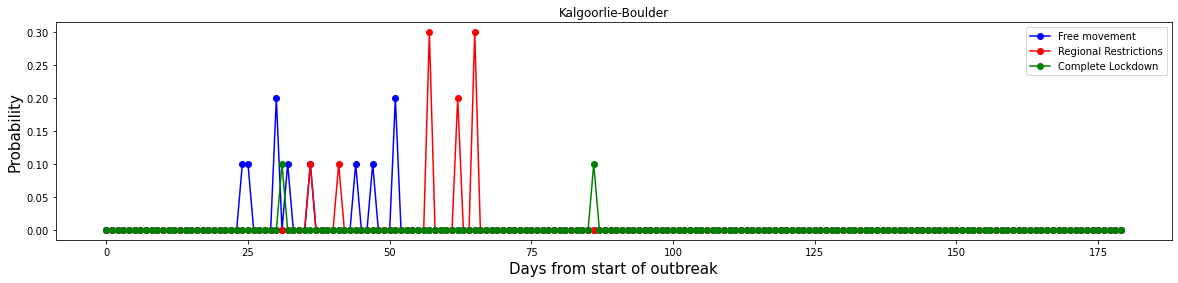

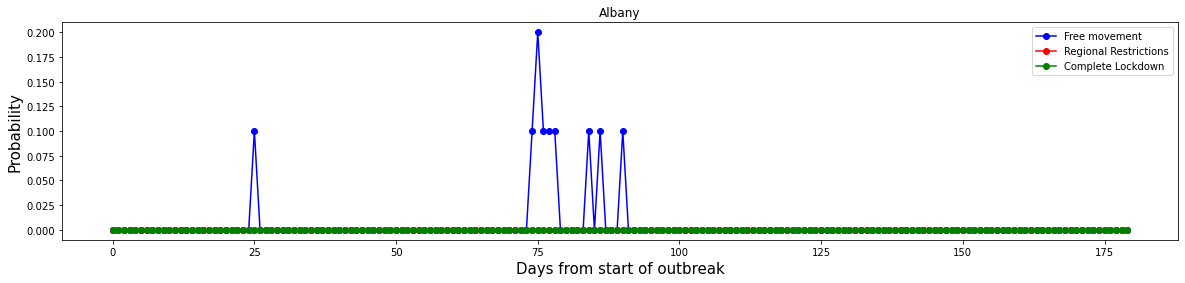

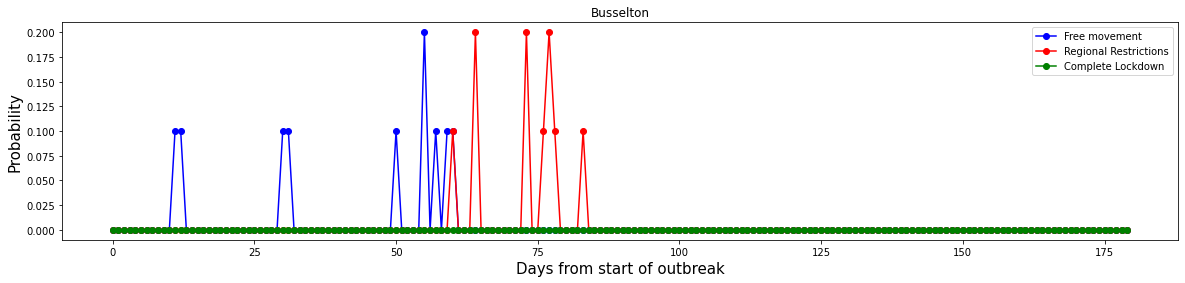

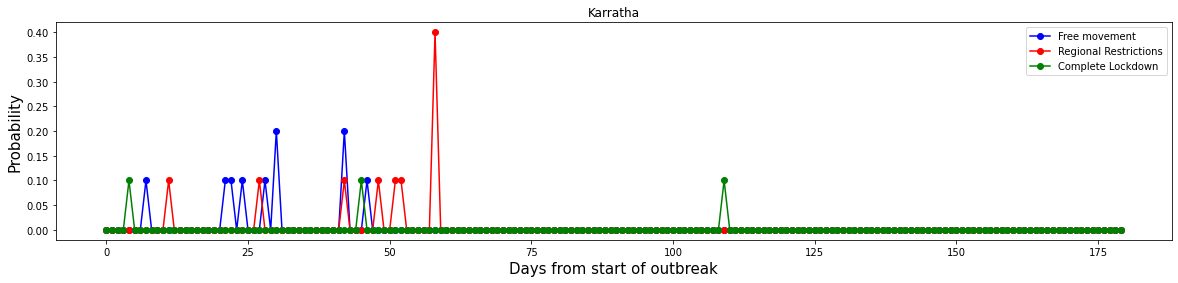

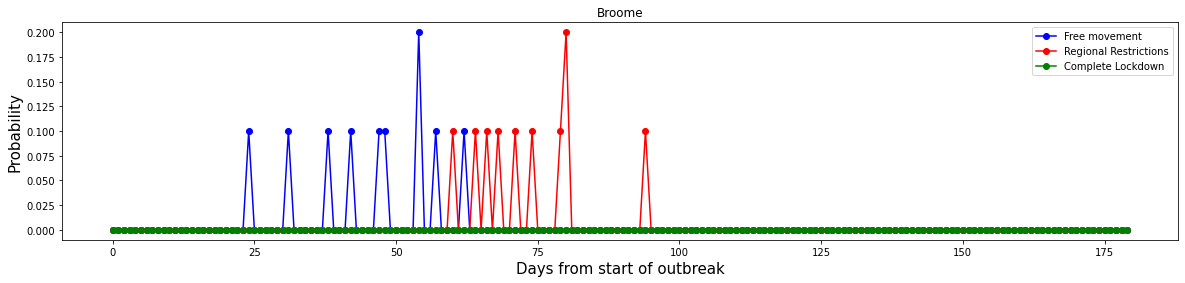

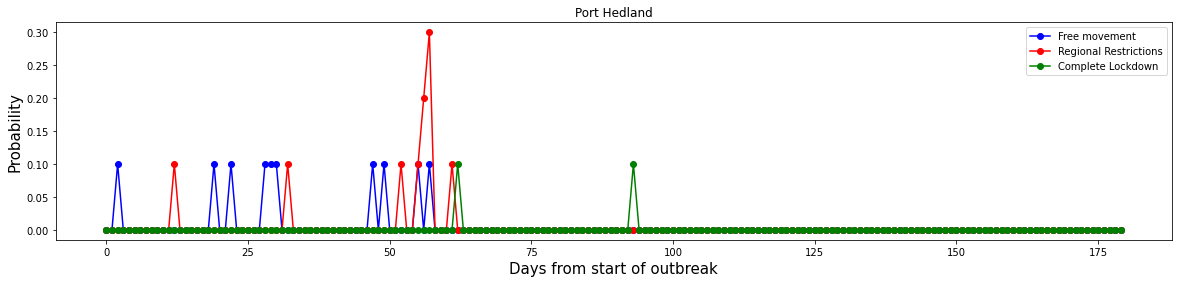

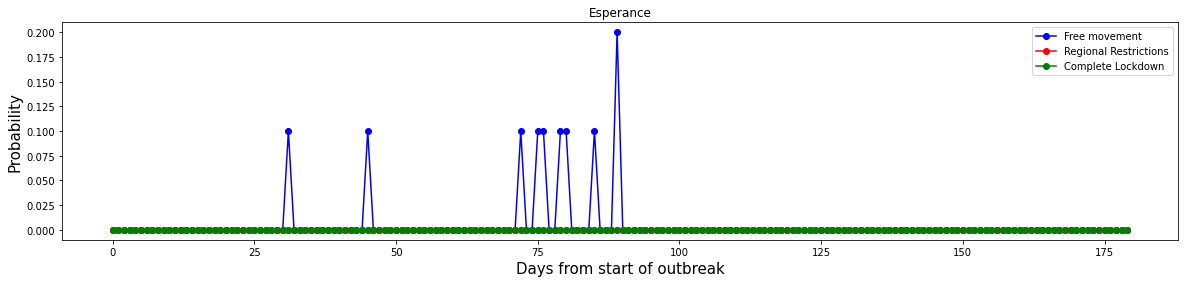

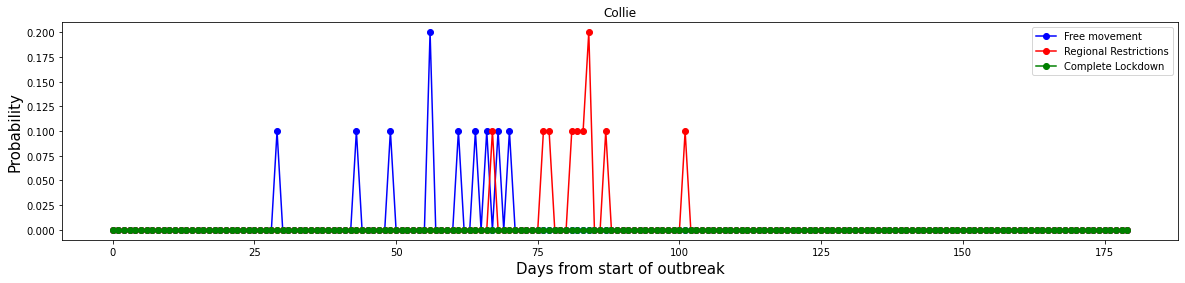

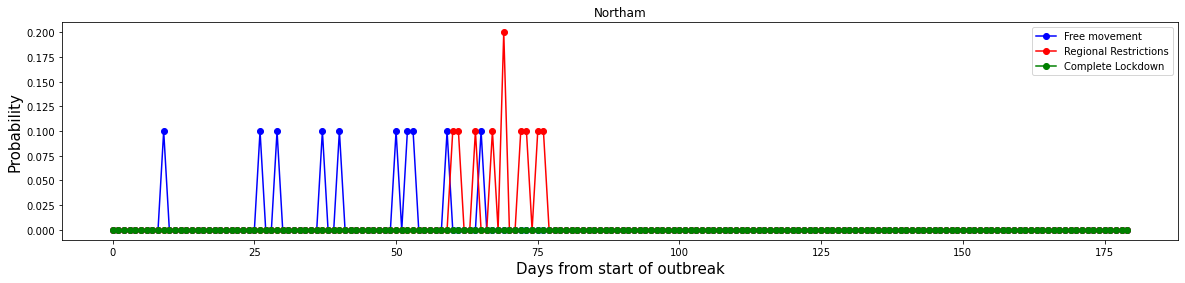

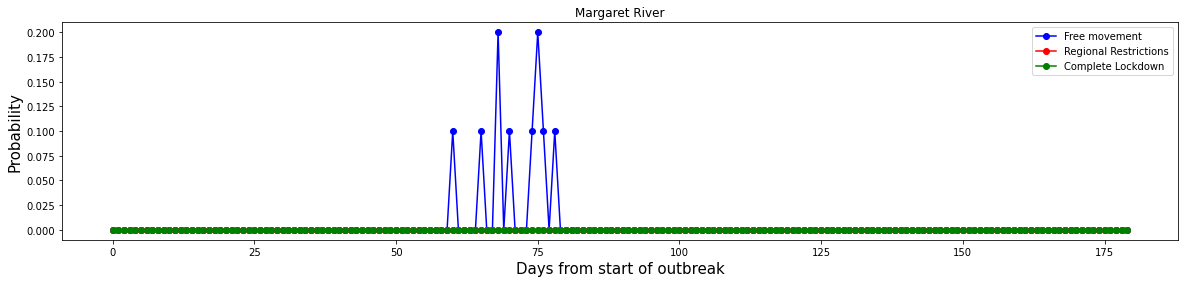

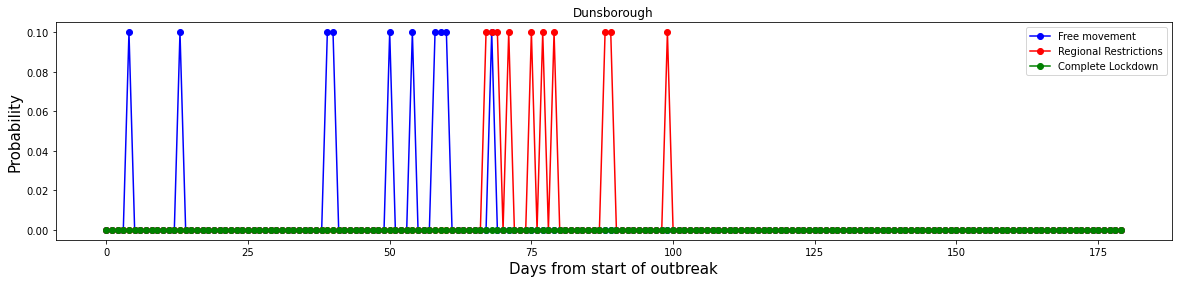

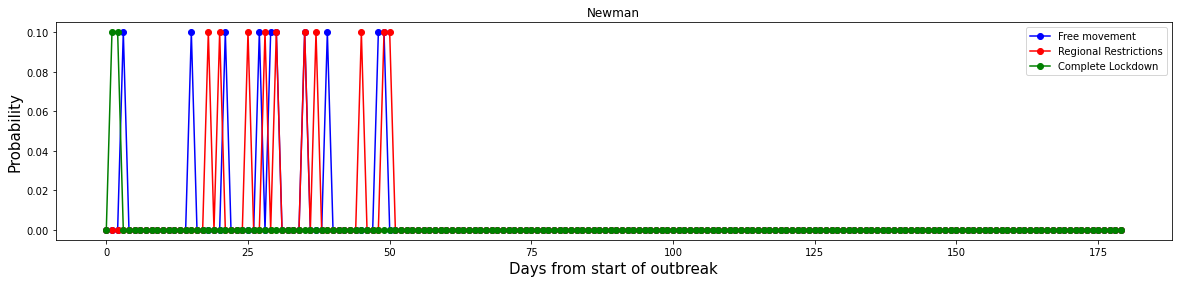

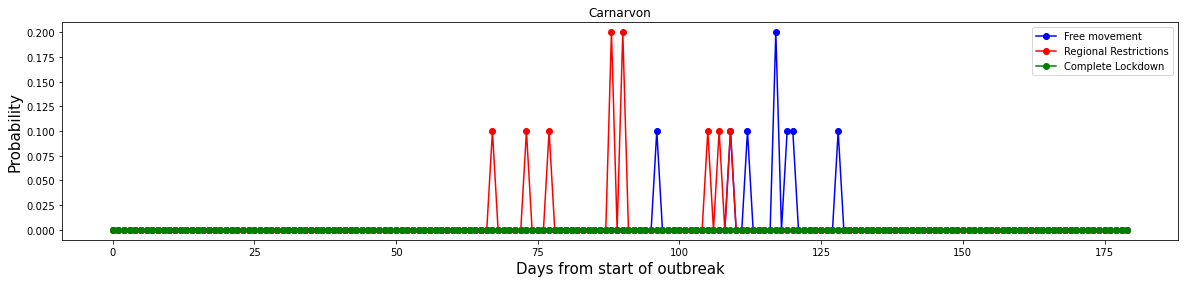

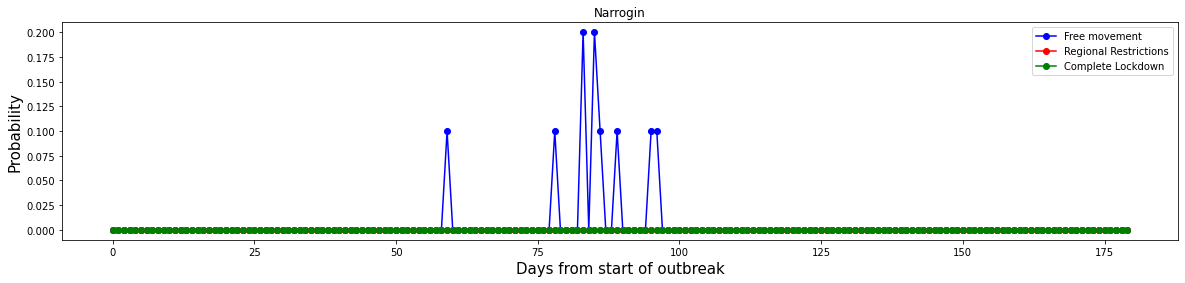

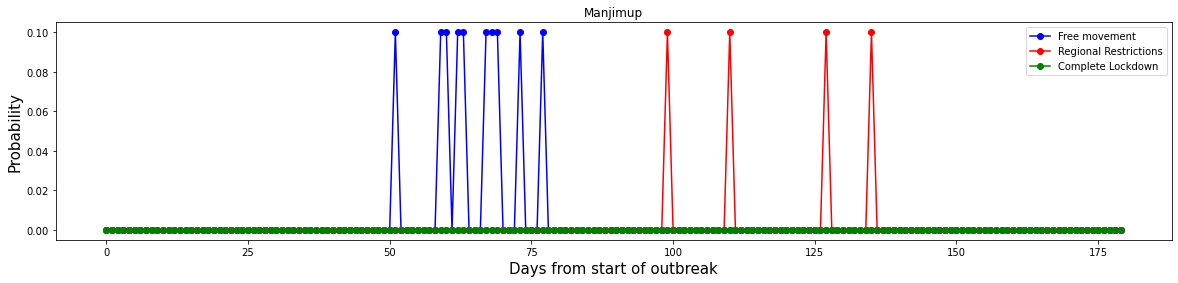

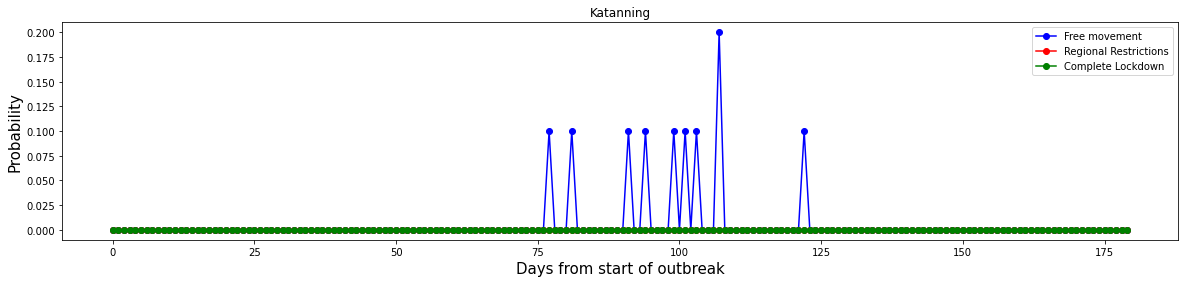

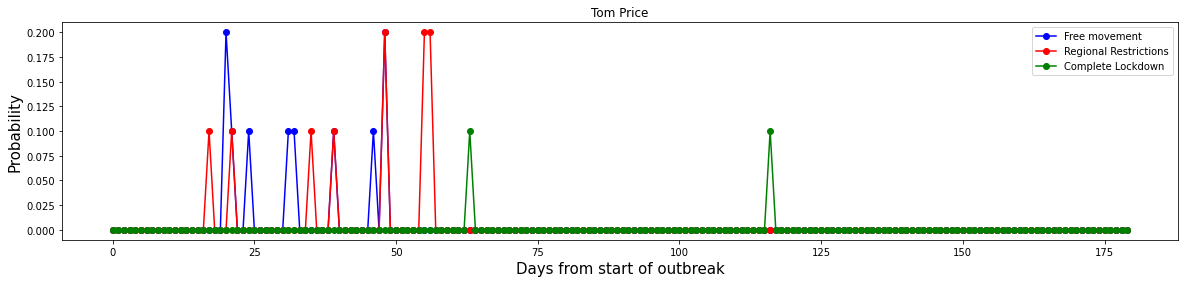

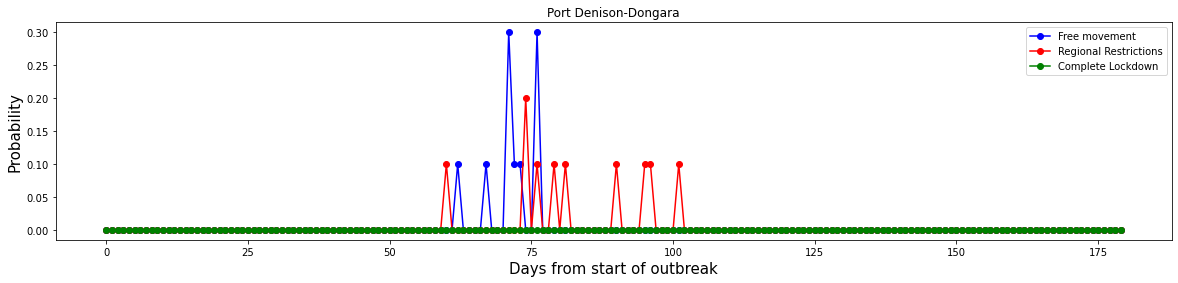

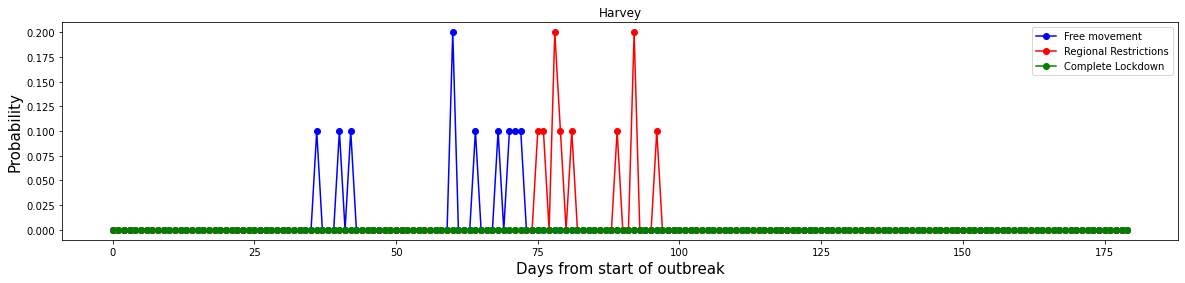

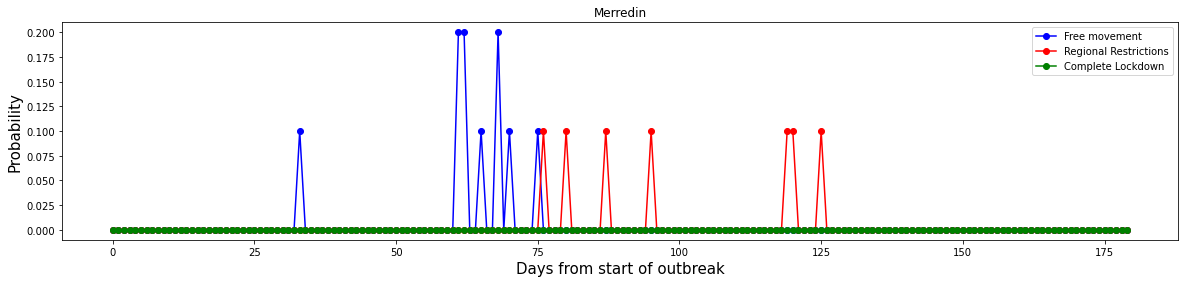

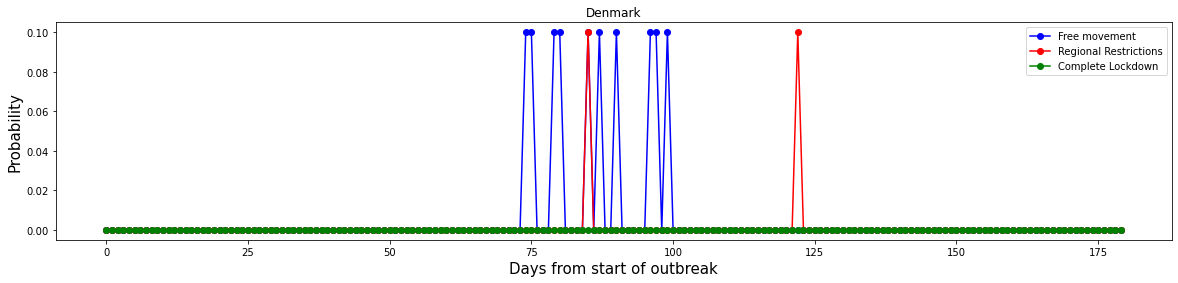

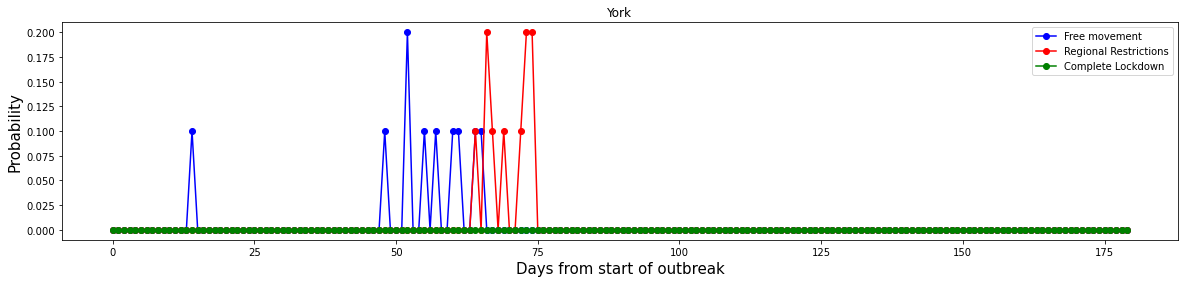

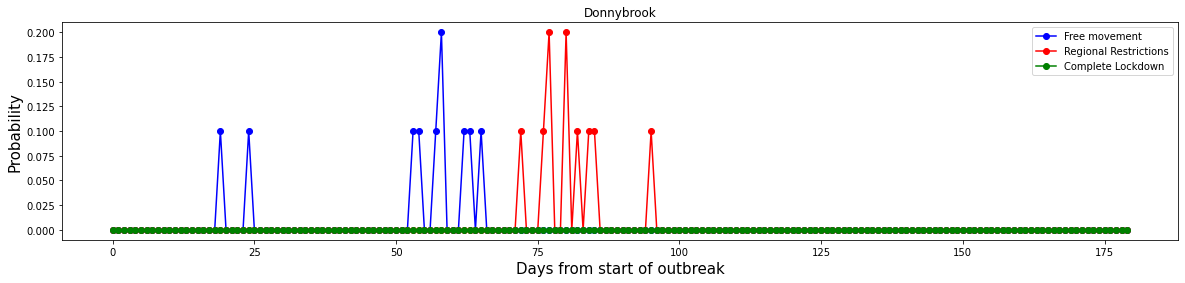

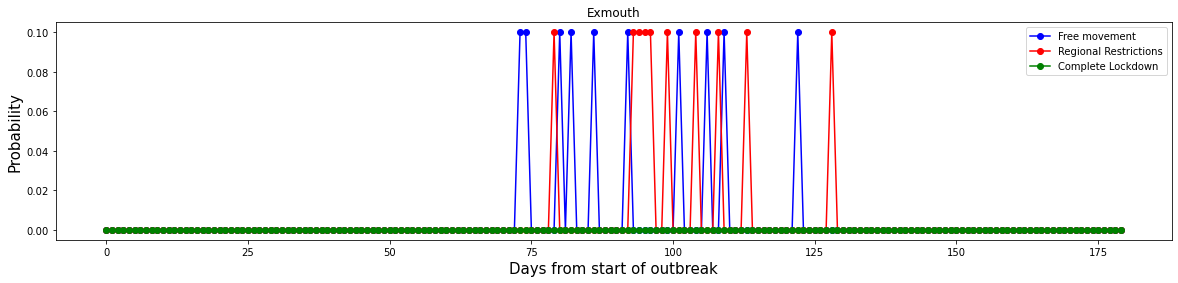

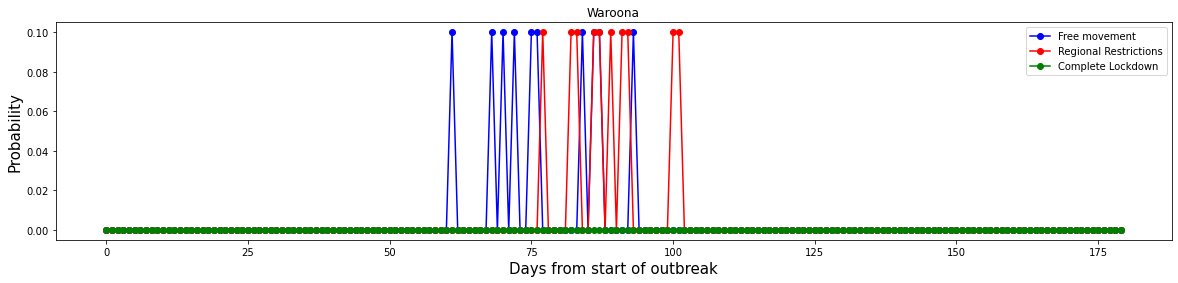

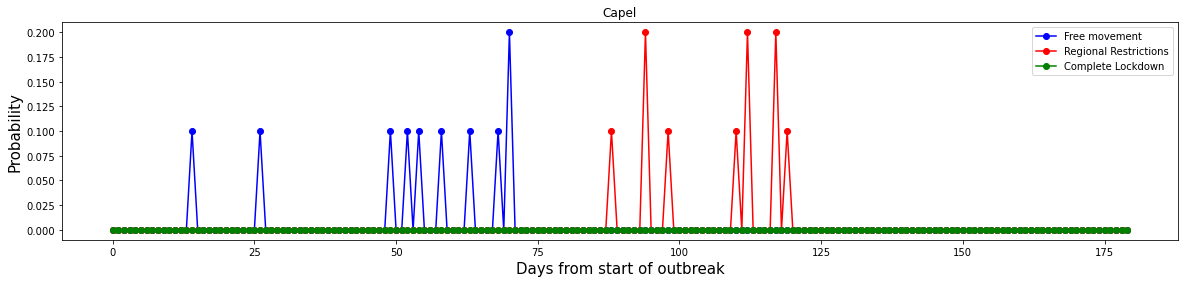

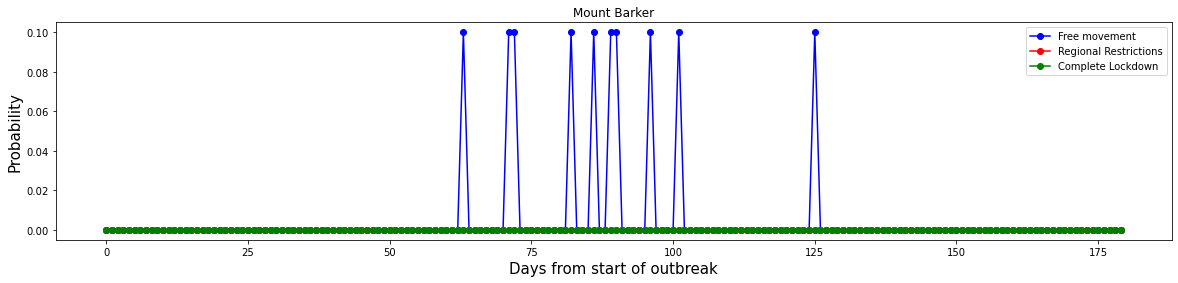

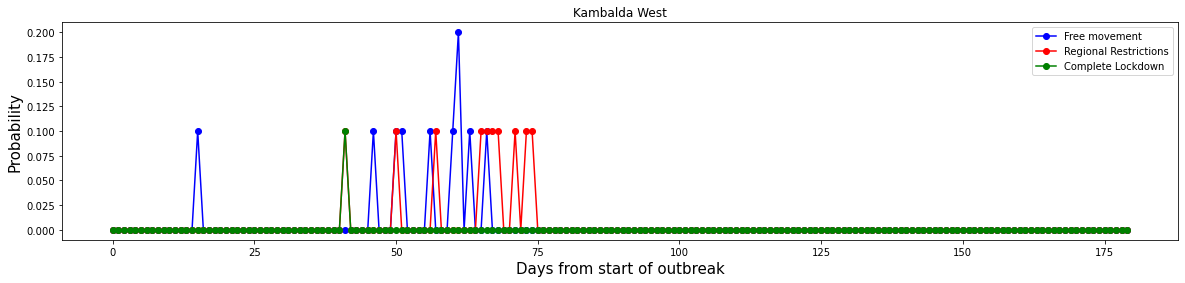

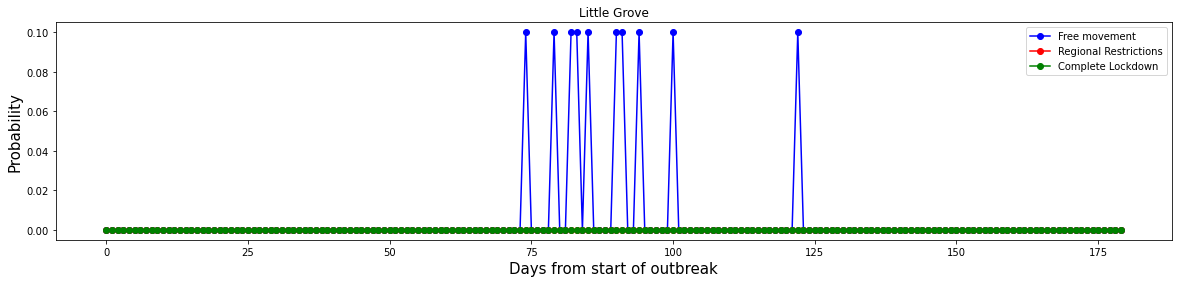

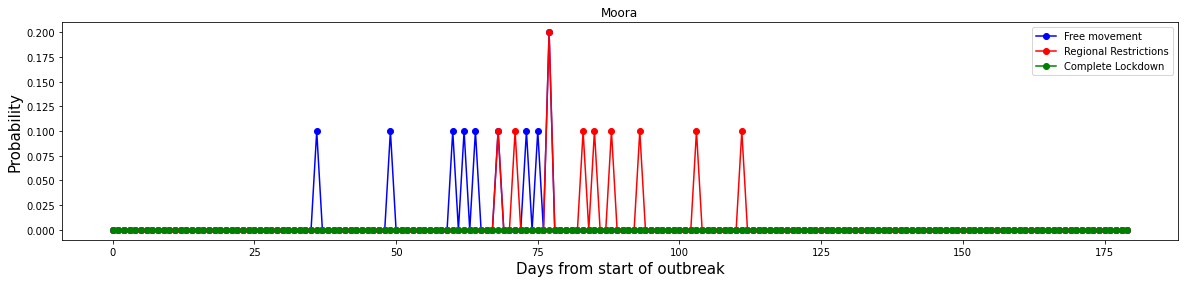

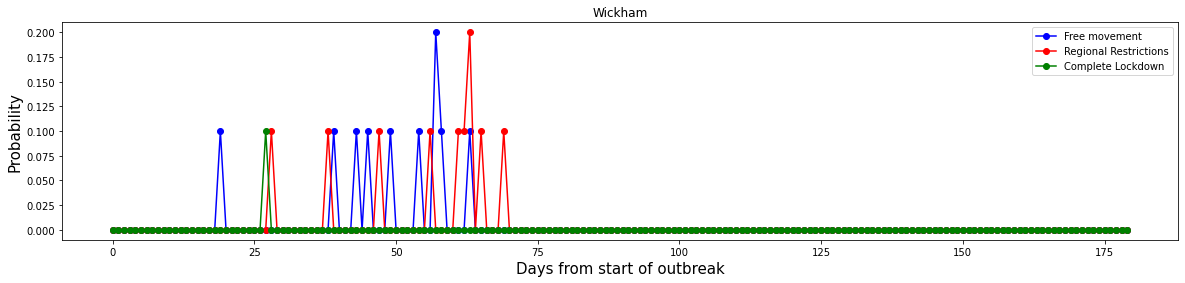

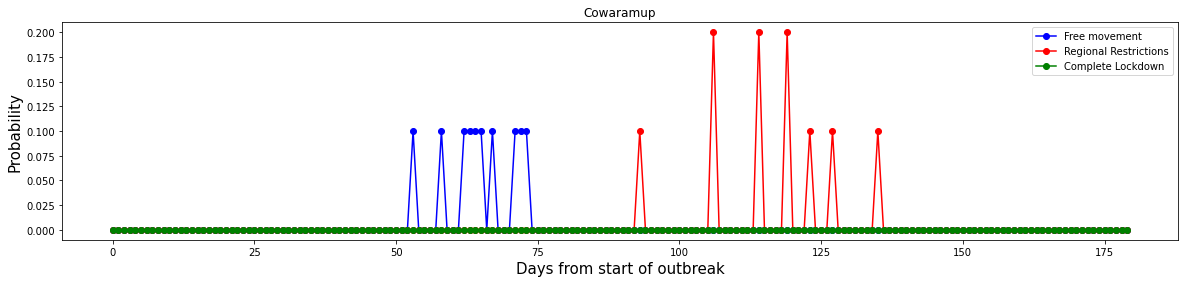

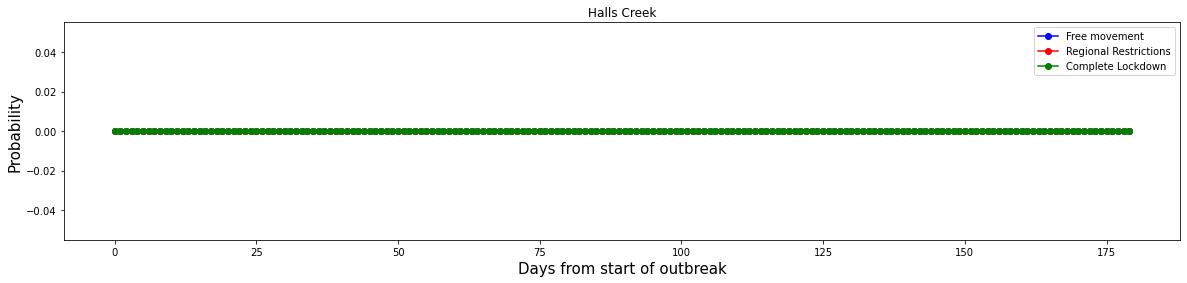

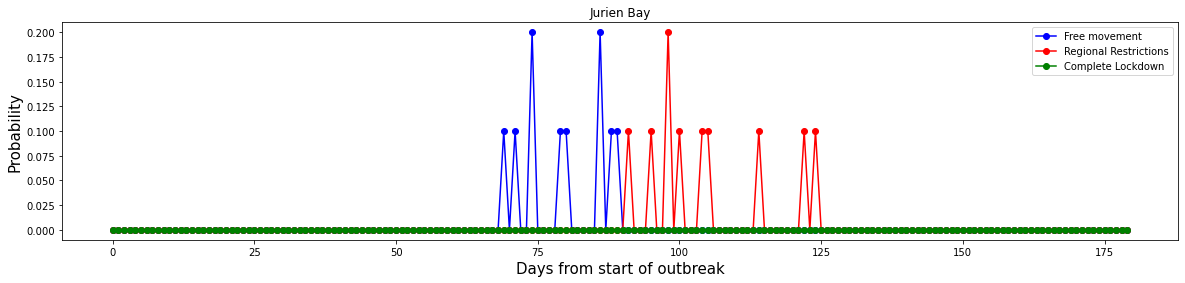

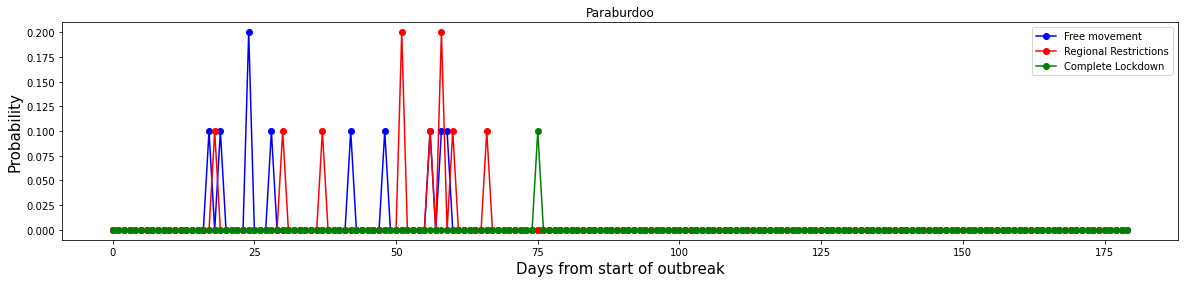

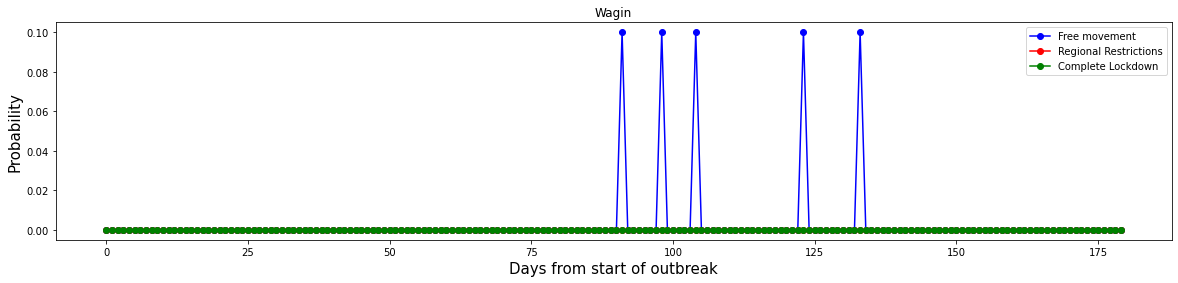

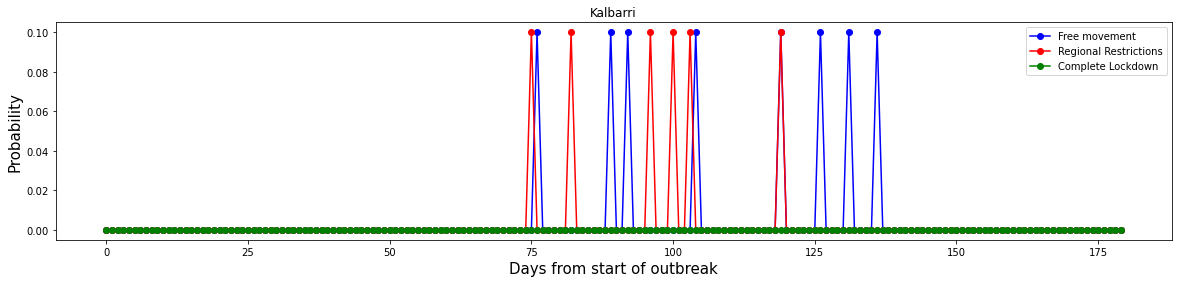

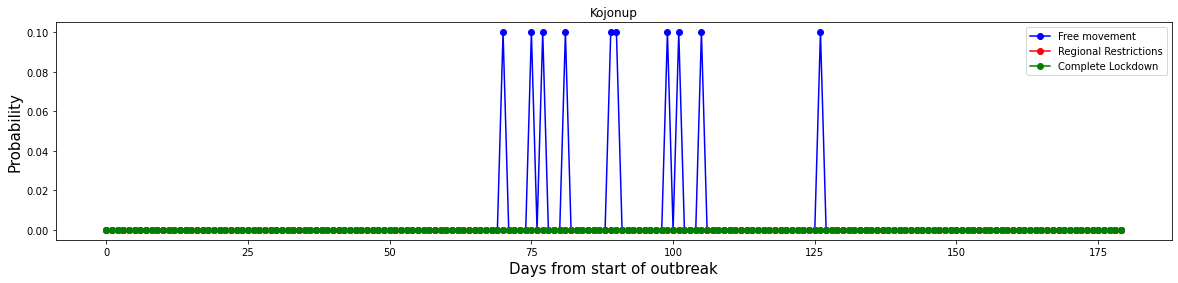

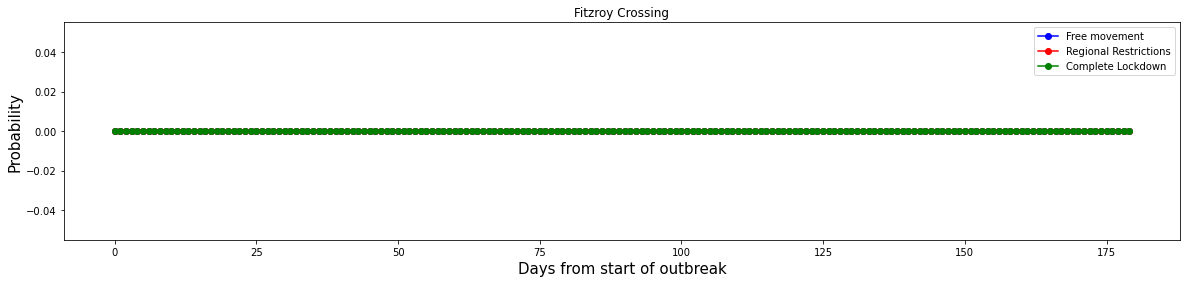

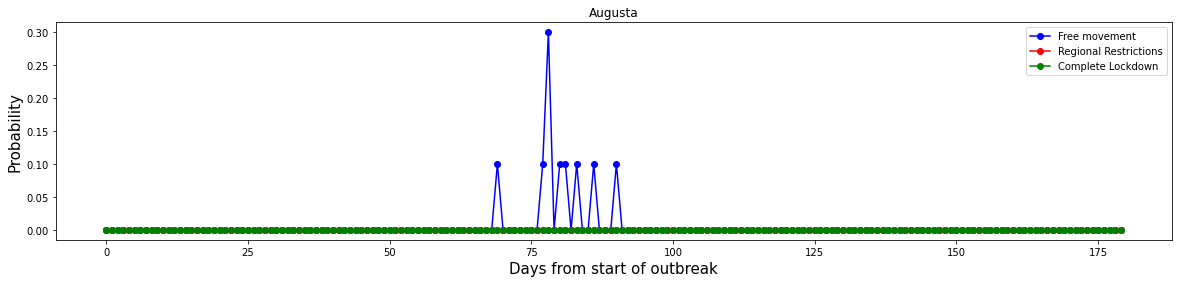

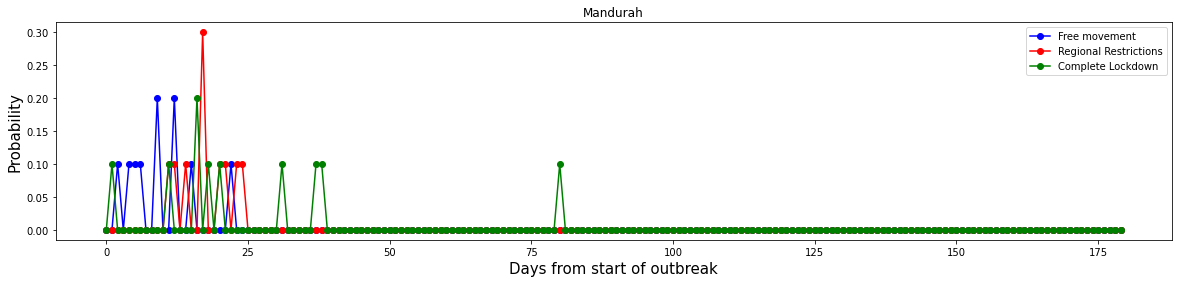

In [14]:
for i in range(44):
    plt.figure(figsize = (20,4))
    tot_free = []
    cou = Counter(list(free[i]))
    ave = 0
    for day in range(180):
        tot_free.append(cou.get(day,0)/len(free))
        ave += day*cou.get(day,0)
    ave = str(ave/len(free))
    town = list(waloc.iloc[i])[0]
    breakin = str(round(sum(tot_free)*100,1))
    
    tot_regn = []
    cou = Counter(list(regn[i]))
    ave = 0
    for day in range(180):
        tot_regn.append(cou.get(day,0)/len(regn))
        ave += day*cou.get(day,0)
    ave = str(ave/len(regn))
    town = list(waloc.iloc[i])[0]
    breakin = str(round(sum(tot_regn)*100,1))
    
    tot_lock = []
    cou = Counter(list(lock[i]))
    ave = 0
    for day in range(180):
        tot_lock.append(cou.get(day,0)/len(lock))
        ave += day*cou.get(day,0)
    ave = str(ave/len(lock))
    town = list(waloc.iloc[i])[0]
    breakin = str(round(sum(tot_lock)*100,1))
    
    
    plt.title(town)# + ', ' + breakin  + '% break in, average day: ' + ave, fontsize = 20)
    plt.plot(tot_free, marker = 'o', color = 'blue', label = 'Free movement')
    plt.plot(tot_regn, marker = 'o', color = 'red', label = 'Regional Restrictions')
    plt.plot(tot_lock, marker = 'o', color = 'green', label = 'Complete Lockdown')
    plt.legend()
    plt.xlabel('Days from start of outbreak', fontsize = 15)
    #plt.ylim([-0.005,0.075])
    plt.ylabel('Probability', fontsize = 15)

# Flow checks

In [29]:
lvl2 = pd.read_csv("/Volumes/HardDrive/New_Workflow/restrictions_44_<250/level_2.csv", header = None, sep =',')

In [30]:
st = os.listdir("/Volumes/HardDrive/New_Workflow/symm_stoc_44_<250")

stoch = []
for i in st:
    if '._' not in i:
        stoch.append(i)
        
d = {}
for i in range(len(stoch)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_44_<250/"+stoch[i], header = None, sep =',')

In [31]:
for j in range(44):
    allup = []
    for i in range(len(stoch)):
        allup.append(sum(list(d[str(i)][j])))
    if sum(allup) == 0:
        print(j, list(waloc.iloc[j])[0])

In [35]:
C = 9*10**9

In [36]:
for j in range(44):
    allup = sum(list(lvl2[j]))*C
    #if allup == 0:
    print(j, list(waloc.iloc[j])[0], allup)

0 Perth 156679.47337179093
1 Bunbury 21487.39682510592
2 Geraldton 1866.3588649259473
3 Kalgoorlie-Boulder 8087.131073193139
4 Albany 7088.1672331516875
5 Busselton 24703.33285801632
6 Karratha 12474.065831595539
7 Broome 5071.744648886591
8 Port Hedland 8526.244539065228
9 Esperance 79.63825546910431
10 Collie 4738.369141093193
11 Northam 5217.099231733355
12 Margaret River 1680.0595499688752
13 Dunsborough 16110.603776916436
14 Newman 19328.97500672902
15 Carnarvon 240.62533759612714
16 Narrogin 837.9864058480835
17 Manjimup 2311.0250254963335
18 Katanning 1002.3053249897932
19 Tom Price 10018.412971513802
20 Port Denison-Dongara 1536.04859844466
21 Harvey 3226.2426895014987
22 Merredin 910.5834879942133
23 Denmark 4093.1666159572947
24 York 3028.6367486514455
25 Donnybrook 7972.743024339524
26 Exmouth 81.33274903297281
27 Waroona 89.08022212292173
28 Capel 7742.954051042886
29 Mount Barker 1496.7399096701708
30 Kambalda West 1463.758948436151
31 Little Grove 5308.3620678798425
32 Mo

In [16]:
waloc.iloc[22]

City / Town    Port Denison-Dongara
Population                     2782
long                        114.922
latt                       -29.2339
Name: 22, dtype: object

In [62]:
sum(list(d[str(0)][9]))

0.0

In [22]:
for i in range(48):
    if np.isnan(np.nanmean(cb[i])):
        print(i,list(waloc.iloc[i])[0])

9 Esperance
15 Carnarvon
16 Kununurra
20 Derby
37 Halls Creek
43 Boddington-Ranford
44 Fitzroy Crossing
47 Wyndham


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
